In [4]:
library(cosinor)
library(ggplot2)
library(readxl)
library(psych)

In [5]:
my_data <- read_excel("Project.xlsx")

In [ ]:
summary(my_data)

In [ ]:
head(my_data)

In [6]:
my_data[,1] -> time
my_data[,2] -> time_
my_data[,3] -> Average_SBP
my_data[,4] -> Average_DBP
my_data[,5] -> Average_PulseR

unlist(time, use.names=FALSE) -> time
unlist(Average_SBP, use.names=FALSE) -> Average_SBP
unlist(Average_DBP, use.names=FALSE) -> Average_DBP
unlist(Average_PulseR, use.names=FALSE) -> Average_PulseR

In [ ]:
summary (Average_SBP)
summary (Average_DBP)
summary (Average_PulseR)

In [ ]:
head(my_data)

In [ ]:
p = ggplot(my_data , aes(x=Time_hours)) +  geom_line(aes( y=Average_SBP), color = "blue", size = 0.8) + geom_line(aes( y=Average_DBP), color = "blue", size = 0.8) + geom_line(aes( y=Average_PulseR), color = "blue", size = 0.8)
#p1 = p + geom_point(aes( y=Average_DBP), color = "red") + geom_point(aes(y = Average_SBP), color="blue")
p2 = p + scale_x_continuous(breaks=seq(0,30,1)) + scale_y_continuous(breaks=seq(0,150,15)) + expand_limits(x=10, y=0)
p3=p2 + coord_fixed(ratio=1/18)
p3 + geom_segment(aes(x=Time_hours, xend=Time_hours, y=Average_SBP, yend=Average_DBP), 
        size=0.5, data=my_data, colour="blue")




In [ ]:
ggplot(my_data , aes(x=Time_hours)) + geom_line(aes( y=Average_SBP), color = "blue") + geom_line(aes( y=Average_DBP), color = "grey") + geom_point(aes( y=Average_DBP), color = "grey") 

ggplot(my_data , aes(x=Time_hours, y=Average_SBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm") + ggtitle("Systolic Blood Pressure") + xlab("Time in hours")

ggplot(my_data , aes(x=Average_SBP)) + geom_histogram()

ggplot(my_data , aes(x=Average_SBP)) + geom_density( color = "RED")

cosinor(time,Average_SBP)

timeTemp2 <- data.frame(time,Average_SBP)
summary(timeTemp2)

cosinor.plot("time","Average_SBP",data=timeTemp2)

In [ ]:
#predict(fit)

In [ ]:
ggplot(my_data , aes(x=Time_hours, y=Average_DBP)) + geom_line()

ggplot(my_data , aes(x=Time_hours, y=Average_DBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm") + ggtitle("Dialstolic Blood Pressure") + xlab("Time in hours")

ggplot(my_data , aes(x=Average_DBP)) + geom_histogram()

ggplot(my_data , aes(x=Average_DBP)) + geom_density( color = "BLUE")

cosinor(time,Average_DBP)

timeTemp3 <- data.frame(time,Average_DBP)
summary(timeTemp3)

cosinor.plot("time","Average_DBP",data=timeTemp3)

In [ ]:
ggplot(my_data , aes(x=Time_hours, y=Average_PulseR)) + geom_line()

ggplot(my_data , aes(x=Time_hours, y=Average_DBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm") + ggtitle("Pulse Rate") + xlab("Time in hours")

ggplot(my_data , aes(x=Average_PulseR)) + geom_histogram()

cosinor(time,Average_PulseR)

timeTemp3 <- data.frame(time,Average_PulseR)
summary(timeTemp3)

cosinor.plot("time","Average_PulseR",data=timeTemp3)

In [ ]:
#Correlation
ggplot(my_data , aes(x=Average_DBP, y=Average_SBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm")

ggplot(my_data , aes(x=Average_SBP, y=Average_DBP)) + geom_point() + geom_smooth( se = TRUE, method = "lm")

In [7]:
#str(time)
#str(Average_SBP)
df<-data.frame(time,Average_SBP,Average_DBP)
#tail(df)

In [ ]:
fit <- cosinor.lm(time ~ time(time) + Average_SBP + amp.acro(Average_SBP), data = df)
#summary(fit)
test_cosinor(fit, "Average_SBP", param = "amp")
#summary(predict(fit))
ggplot.cosinor.lm(fit, x_str = "Average_SBP") + coord_fixed(ratio=1/25)
ggplot(df , aes(x=time, y=Average_SBP)) + geom_point()

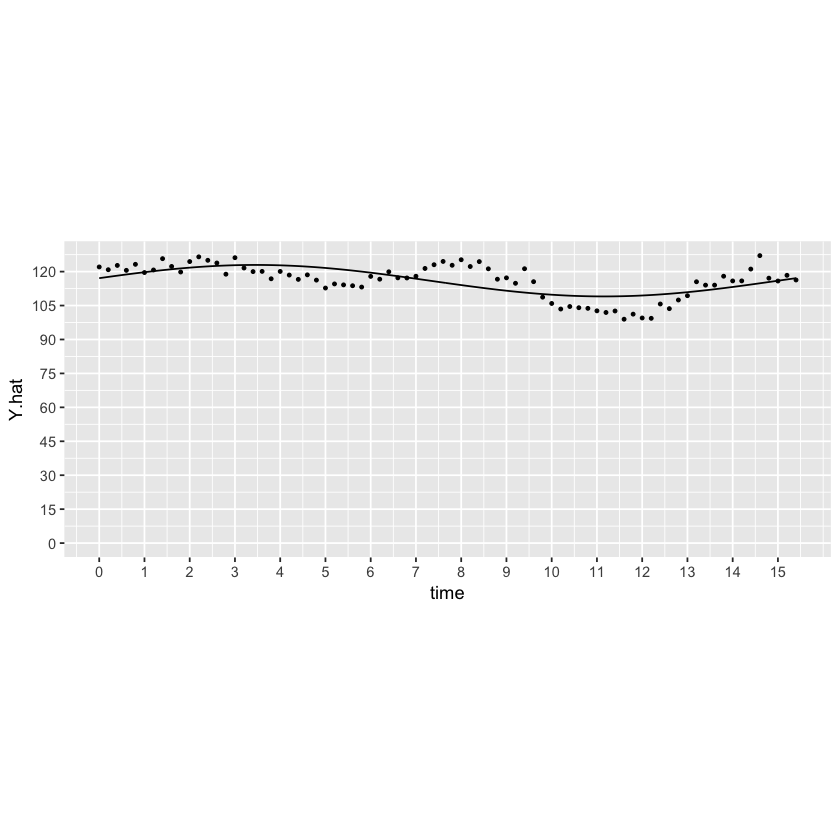

In [8]:
fit <- cosinor.lm(Average_SBP ~ time(time), period=15.4, data = df)
fit2 <- cosinor.lm(Average_DBP ~ time(time), period=15.4, data = df)
#fit <- cosinor.lm(Average_SBP ~ time(time), data = df)
#summary(fit)
#test_cosinor(fit, "Average_SBP", param = "amp")
#summary(predict(fit))
library(ggplot2)
#p <- ggplot(df , aes(x=time, y=Average_SBP)) + geom_point()


a = ggplot.cosinor.lm(fit)  + geom_point(data=df , aes(x=time, y=Average_SBP), size = 0.7)
a = a + scale_x_continuous(breaks=seq(0,15,1)) + scale_y_continuous(breaks=seq(0,150,15))
a = a + expand_limits(x=10, y=0) + coord_fixed(ratio=1/20)
a

In [ ]:
# data fits both linear and cosinor models (but not very well)
#cos.model <- cosinor.lm(time ~ time(time), period=24, data=df)
#fit <- cosinor.lm(time ~ time(time) + Average_SBP + amp.acro(Average_SBP), data = df)
#summary(fit)
#test_cosinor(fit, "time", param = "Average_SBP")
#summary(predict(fit))
#ggplot.cosinor.lm(fit, x_str = "time") 
#(ggplot(vitamind , aes(x=time, y=Average_SBP)) + geom_point())
#ggplot.cosinor.lm(fit, x_str = "Average_SBP") 
#ggplot(df , aes(x=time, y=Average_SBP)) + geom_point()


#summary(cos.model)
#l.model <- lm(resp ~ time, data=df)
#summary(l.model)

#plot with a loess smoother looks like a combination of the models 
#plot to see fit

#ggplot(df, aes(x = time, y = resp))+
#  geom_point()+
#  geom_smooth(method = "lm", se = FALSE)

#fit <- cosinor.lm(time ~ time(time) + X + amp.acro(Average_SBP), data = df, period = 12)
#summary(fit)
#test_cosinor(fit, "Average_SBP", param = "amp")
#summary(vitamind$Y)
#summary(predict(fit))
#ggplot.cosinor.lm(fit, x_str = "X") 
#(ggplot(vitamind , aes(x=X, y=time)) + geom_point())



#library(cosinor)
#fit <- cosinor.lm(Y ~ time(time) + X + amp.acro(X), data = vitamind, period = 12)
#summary(fit)
#test_cosinor(fit, "X", param = "amp")
#summary(vitamind$Y)
#summary(predict(fit))
#library(ggplot2)
#summary(vitamind)
#ggplot.cosinor.lm(fit, x_str = "X") 
#(ggplot(vitamind , aes(x=X, y=time)) + geom_point())


#Time=c(1,2,3,4,24)     #add more times 
#Rectal=c(33.8,37.6,37.1,35.5,38.2)  #add more temperatures 
#cosinor(Time,Rectal)
#timeTemp <- data.frame(Time,Rectal)
#cosinor.plot("Time","Rectal",data=timeTemp)

#str(vitamind)
#cosinor.plot("time","X",data=timeTemp2,)
#fit <- cosinor.lm(Time_hours ~ time(Time_hours) + Average_SBP+ amp.acro(Average_SBP), data = my_data)
#cosinor_analyzer(data = vitamind)
#str(vitamind)



In [ ]:
#for (i in 1:78){
#   x1 = time[i]
#   y1 = Average_SBP[i]
#   y2 = Average_PulseR[i]
#   X = c(x1,x1)
#   Y = c(y1,y2)
#   df = data.frame(X,Y)
#   p3 = p3 + geom_segment(aes(x = x1, y = y1, xend = x1, yend = y2))
#p3
#}
#p3